In [1]:
# Necessary libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
NB1 = 1.3199 # +- 0.066
NB2 = 0.7066 # +- 0.049
IB1 = 0      # A
IB2 = 4.2    # A

k = (NB1 - NB2) / (IB1 - IB2)
b = (NB1 * IB2 - NB2 * IB1) / (IB2 - IB1)

getBack = lambda I: k * I + b

In [88]:
df = pd.read_csv('./src/csv/all.csv', sep=',', header=0, index_col=False)
df['N - N_b'] = df['N'] - getBack(df['I'])

df.set_index('I', inplace=True)
df

,N,N - N_b
I,,
0.10,1.350,0.044702
0.20,1.390,0.099305
0.30,1.160,-0.116093
0.40,1.520,0.258510
0.50,1.480,0.233112
0.70,2.019,0.801317
0.80,2.069,0.865919
0.90,2.119,0.930521
1.00,2.919,1.745124


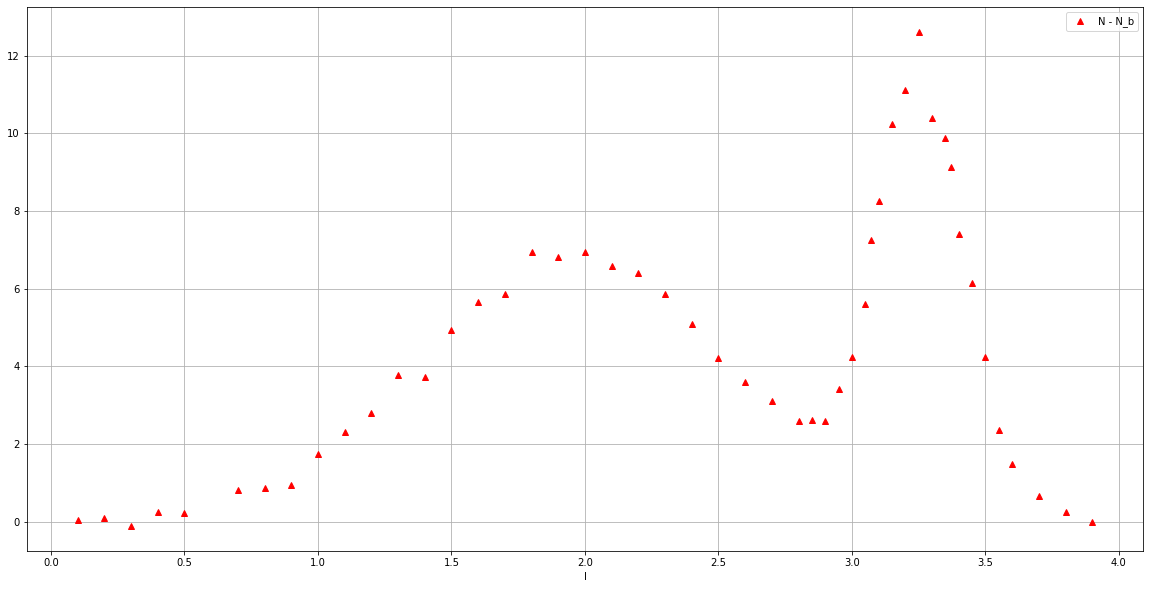

In [96]:
axes = df.iloc[:, 1:].plot(figsize=(20, 10), style='^r', grid=True)